<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/master/AnalyseTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des libraries nécessaires

In [1]:
!pip install --upgrade pandas

In [2]:
import pandas as pd
# import pickle

Liaison au Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"

Mounted at /content/drive


 La base de données compte 926.188 tweets et les variables suivantes :

*    user_id : l'identifiant twitter du compte
*     user_screen_name : le nom twitter du compte
*    id_tweet : l'identifiant twitter du tweet
*    created_at : la date à laquelle a été publié le tweet
*     tweet : le tweet
*    retweet_count : le nombre de fois à laquelle le tweet a été retweeté
*     favorite_count : le nombre de fois à laquelle le tweet a été mis en favori
*    liability : la fiabilité du compte twitter (donné par les données decodex)
*    liability_label : le label de la fiabilité du compte twitter
*    description : la description du compte twitter (donné par les données decodex)
*    count_followers : le nombre de followers total du compte twitter

Les données pour analyser : liability, retweet_count, favorite_count, count_followers -> pourcentage de "partage" selon nb followers -> tableau de pourcentage selon fiabilité

Réutiliser tweets pour trouver patterns pour analyser nouveaux tweets (scattertext ?)

Code pour obtenir les données de data_tweets.

In [7]:
import pickle

with open(DATA_PATH+"data_tweets.txt", "rb") as file :  
    data_tweets = pickle.load(file)

data_tweets.head(5)

,user_id,user_screen_name,id_tweet,created_at,tweet,retweet_count,favorite_count,liability,description,liability_label,count_followers
0,78957336,france_soir,1466789582213681162,2021-12-03 15:21:02+00:00,🚨Le professeur Raoult écope d’un blâme de l’Or...,50,101,2,France-Soir était un journal fondé par Pierre ...,site qui diffuse régulièrement de la fausse in...,98322
1,78957336,france_soir,1466768535921831946,2021-12-03 13:57:24+00:00,RT @DIVIZIO1: Recours déposé !,643,0,2,France-Soir était un journal fondé par Pierre ...,site qui diffuse régulièrement de la fausse in...,98322
2,78957336,france_soir,1466757902773932035,2021-12-03 13:15:09+00:00,"🎙BEST OF - Pr Michel Drancourt : IHU, épidémie...",27,59,2,France-Soir était un journal fondé par Pierre ...,site qui diffuse régulièrement de la fausse in...,98322
3,78957336,france_soir,1466739848509890566,2021-12-03 12:03:25+00:00,"📚 Jonathan Curiel, directeur général adjoint d...",14,37,2,France-Soir était un journal fondé par Pierre ...,site qui diffuse régulièrement de la fausse in...,98322
4,78957336,france_soir,1466731706912751619,2021-12-03 11:31:04+00:00,🖍 Le dessin du jour\n&gt; à retrouver sur http...,39,79,2,France-Soir était un journal fondé par Pierre ...,site qui diffuse régulièrement de la fausse in...,98322


In [8]:
data_tweets.shape

(926188, 11)

Regroupe par fiabilité pour compter nb user selon la fiabilité

In [9]:
data_tweets.groupby("liability_label").user_screen_name.nunique()

liability_label
site parodique                                              31
site qui diffuse régulièrement de la fausse information     52
site réputé fiable                                         201
site à la fiabilité douteuse                                39
Name: user_screen_name, dtype: int64

In [10]:
data_tweets.groupby("liability_label").id_tweet.nunique()

liability_label
site parodique                                              51506
site qui diffuse régulièrement de la fausse information    133675
site réputé fiable                                         632999
site à la fiabilité douteuse                               108008
Name: id_tweet, dtype: int64

In [11]:
data_tweets.id_tweet.describe()

count                  926188
unique                 926188
top       1466789582213681162
freq                        1
Name: id_tweet, dtype: object

#Pensez à :

Vérifier si données manquantes

Vérifier si doublon

Vérifier distribution des RT (par liability label)

#Affichage Boxplot pour analyser visuellement

In [12]:
import seaborn as sns

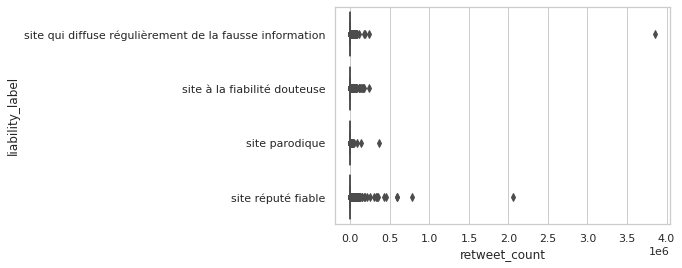

In [13]:
# boxplot
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="retweet_count", y="liability_label", showfliers=True)

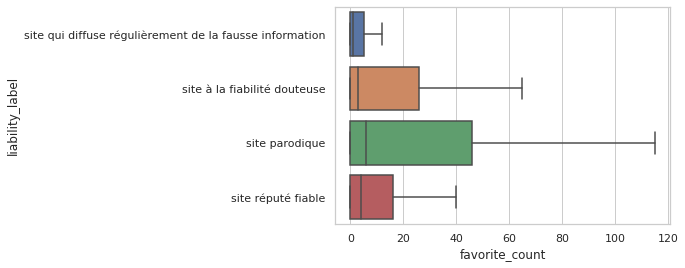

In [ ]:
# boxplot
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="favorite_count", y="liability_label", showfliers=False)

On crée un autre tableau avec seulement compte, fiabilité, followers, pour comparer les nb de followers

In [ ]:
df_comptes = data_tweets.copy()
df_comptes = df_comptes[["user_screen_name", "liability_label","count_followers"]]
df_comptes = df_comptes.drop_duplicates()
len(df_comptes)

323

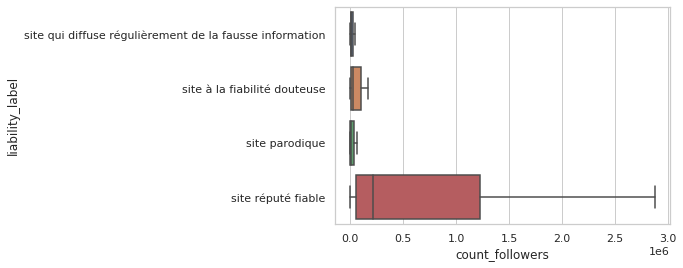

In [ ]:
sns.set_theme(style="whitegrid")

aax = sns.boxplot(data=df_comptes, x="count_followers", y="liability_label", showfliers=False)

Ajout de colonnes pour les pourcentage de RT et Like selon le nb de followers de l'user

In [ ]:
list_percent_rt = []
list_percent_fav = []
for index, row in data_tweets.iterrows():
  list_percent_rt.append(row['retweet_count']/row['count_followers'])
  list_percent_fav.append(row['favorite_count']/row['count_followers'])
data_tweets['rt_per_followers'] = list_percent_rt
data_tweets['fav_per_followers'] = list_percent_fav
data_tweets.head(10)

KeyboardInterrupt: ignored

In [ ]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="rt_per_followers", y="liability_label", showfliers=False)

ValueError: ignored

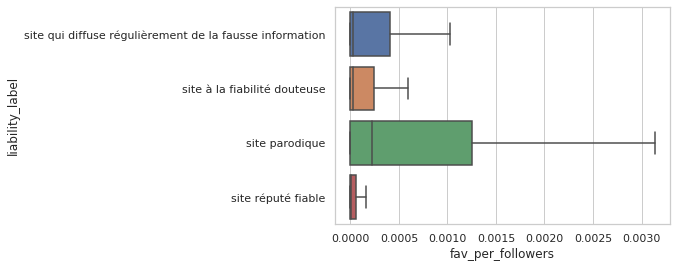

In [ ]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="fav_per_followers", y="liability_label", showfliers=False)

Utiliser les boxplot pour "catégoriser" et essayer de trouver si on peut déjà séparer certains sites

On va retirer les sites parodiques, peut-être regroupper les non fiable et les douteux 

Avec scatterText, récupère 3000 tweets aléatoirement des 2 catégories restantes et, comme schéma, obtenir un graphique HTML qui trouve les mots propre à chaque catégorie.

Besoin de nettoyer les tweets + retirer les liens + les hashtags + les @s

tokeniser/lemmatiser/autres

#Début d'un truc pour scattertext

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French

In [ ]:
spacy.cli.download('fr_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [ ]:
# import pytextrank, spacy
# import scattertext as st
# import numpy as np

# nlp = spacy.load("fr_core_news_md")
# nlp.add_pipe("textrank", last=True)

# convention_df = st.SampleCorpora.ConventionData2012.get_data().assign(
#     parse=lambda df: df.text.apply(nlp),
#     party=lambda df: df.party.apply(
#         {'democrat': 'Democratic', 
#          'republican': 'Republican'}.get
#     )
# )

# corpus = st.CorpusFromParsedDocuments(
#     convention_df,
#     category_col='party',
#     parsed_col='parse',
#     feats_from_spacy_doc=st.PyTextRankPhrases()
# ).build().compact(st.AssociationCompactor(2000, use_non_text_features=True))

Fonction de Manon, description dedans

In [ ]:
 def print_famous_tweets(df, liability, nb_favorites) :

    ''' Cette fonction permet de sélectionner les tweets qui ont eu le plus de favoris
    pour un user_id donné, et de lire le tweet avec les indicateurs des autres variables de la
    base de données  
    '''

    df_sub = df.loc[(df.liability==liability) & (df.favorite_count > nb_favorites),:]
    for irow in range(df_sub.shape[0]):
        df_row = df_sub.iloc[irow,:]
   
        print(df_row["created_at"])
        print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
        print(df_row["tweet"])
        print("\n")


In [ ]:
print_famous_tweets(data_tweets, 2, 10000)

NameError: ignored

Vérifier si longueur des tweets permet de catégoriser selon niveau de fiabilité (exemple : les sites fiables font toujours des tweets de plus de 3 "mots")

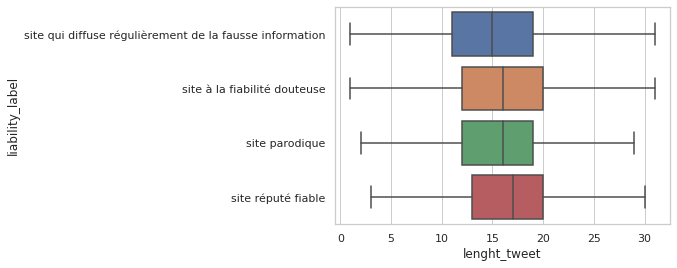

In [ ]:
# Calcul d'une variable contenant le nombre de mots de chaque tweets
data_tweets["lenght_tweet"] = data_tweets["tweet"].apply(lambda tweet : len(tweet.split()))

# Calcul de la distribution de la variable pour chaque label
# data_tweets.groupby(["liability_label"]).lenght_tweet.describe()
ax = sns.boxplot(data=data_tweets, x="lenght_tweet", y="liability_label", showfliers=False)

Test de split (sans paramètre, par défault c'est sur l'espace !)

In [ ]:
"K. ✍🏻 il.bara | IG https://t.co/qbuaNAPOeD".split()

['K.', '✍🏻', 'il.bara', '|', 'IG', 'https://t.co/qbuaNAPOeD']

Vérifier les tweets de 1 "mot"

In [ ]:
data_tweets.loc[data_tweets['lenght_tweet'] == 1, 'tweet']

231       https://t.co/PKeup2vcSq
440       https://t.co/xjlrZptbwS
536                      *Touboul
557       https://t.co/vd57IwKBoC
570       https://t.co/0KyetG1k8u
                   ...           
924809    https://t.co/vrgkb6EHbc
924810    https://t.co/EAIIixZGiw
924811    https://t.co/gw5yUzKsN9
925733    https://t.co/39y0pm1OlZ
926161    https://t.co/VIZXHFZYaV
Name: tweet, Length: 5412, dtype: object

Test pour re.sub

In [ ]:
import re

patterns = ['@[a-zA-Z\u00C0-\u00FF0-9]+', '#[a-zA-Z\u00C0-\u00FF0-9]+', '|', 'https://t.co/[a-zA-Z\u00C0-\u00FF0-9]+']

text = "BTS: *wins artist of the year* Jin and Jungkook: #BTS #BTSxAMAs https://t.co/0UR6X36LFv"

for pattern in patterns:
  text = re.sub(pattern,'', text)
  print(text)

# data_tweets['tweet'] = [re.sub(r'','', str(x)) for x in data_df['transcript']]
# text

BTS: *wins artist of the year* Jin and Jungkook: #BTS #BTSxAMAs https://t.co/0UR6X36LFv
BTS: *wins artist of the year* Jin and Jungkook:   https://t.co/0UR6X36LFv
BTS: *wins artist of the year* Jin and Jungkook:   https://t.co/0UR6X36LFv
BTS: *wins artist of the year* Jin and Jungkook:   


Fonctions pour retirer/remplacer du texte dans les tweets afin de les rendre plus facile à "analyser"

remplacement par 'désindentification_'+nom du truc

In [ ]:
import re
import string

def remove_spaces(tweet):
  tweet = re.sub('\s{2,}', ' ', tweet)
  return tweet

def replace_stuff(tweet):
  tweet = re.sub('\?', 'point_interrogation', tweet)
  tweet = re.sub('https://t.co/[a-zA-Z\u00C0-\u00FF0-9]+', 'lien_twitter', tweet)
  return tweet

def remove_punctuation(tweet):
  result = "".join([ch for ch in tweet if ch not in string.punctuation.replace('_','')])
  return result

def remove_pattern(tweet):
  patterns = ['\n', '|', '@[a-zA-Z\u00C0-\u00FF0-9]+', '#[a-zA-Z\u00C0-\u00FF0-9]+']
  for pattern in patterns:
    tweet = re.sub(pattern, '', tweet)
  return tweet

def simplification(tweet):
  tweet = replace_stuff(tweet)
  tweet = remove_pattern(tweet)
  tweet = remove_punctuation(tweet)
  tweet = remove_spaces(tweet)
  return tweet

In [ ]:
data_tweets["tweet_nettoyé"] = data_tweets["tweet"]

# data_tweets["tweet_nettoyé"] = data_tweets["tweet"].apply(lambda tweet : replace_stuff(tweet)).apply(lambda tweet : remove_pattern(tweet)).apply(lambda tweet : remove_punctuation(tweet)).apply(lambda tweet : remove_spaces(tweet))
data_tweets["tweet_nettoyé"] = data_tweets["tweet"].apply(lambda tweet : simplification(tweet))

In [ ]:
# pd.set_option("max_colwidth", 5000)
# data_tweets["tweet"].head()

for tweet in data_tweets["tweet_nettoyé"].head(15):
  print(tweet)

🚨Le professeur Raoult écope d’un blâme de l’Ordre des médecins Article à paraître sur lien_twitter
RT Recours déposé 
🎙BEST OF Pr Michel Drancourt IHU épidémies dhier et daujourdhuiComment la paléomicrobiologie permet dac… lien_twitter
📚 Jonathan Curiel directeur général adjoint des programmes des chaînes M6 W9 et 6ter a publié en octobre 2021 so… lien_twitter
🖍 Le dessin du jourgt à retrouver sur lien_twitter lien_twitter
🐖L214 a annoncé avoir déposé une plainte pour mauvais traitements envers les animaux et tromperie des consommateur… lien_twitter
Au soutien de ce dossier mais aussi audelà il porte une plainte contre X pour RéInfoLiberté et qui… lien_twitter
🎥 Me Heringuez a défendu un couple de restaurateurs qui avait été en garde à vue en février dernier pour avoir reçu… lien_twitter
L’entretien complet lien_twitter
BEST OF 🎙️ En Guadeloupe Me Ellen Bessis et Soumïâa Sayah expliquent les manipulations de la direction des hôpit… lien_twitter
🖍️ Le dessin du jour par lien_twitter
🛂 L

Petit test si je peux éviter de retirer certaines ponctuations

In [ ]:
string.punctuation.replace('_','')

'!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'

Il est possible que ce ne soit pas Google Colab/Python/N'importe quel entité qui tronqué les tweets trop long mais en réalité tweepy qui nous a envoyé le tweet tronqué, ou quelquechose comme ça ?